# 3D Computer Vision

In [1]:
### Necessary Packages
import cv2
import numpy as np
import calibration
import visualization
import utils

# CALIBRATION

In [2]:
image_path = "last_day/image0101.png"
calibration_image = cv2.imread(image_path)
#points_extra = calibration.select_points_single_image(calibration_image, scale_factor=1.2)

In [3]:
#Donnot forget to channge the extra points!

points3d_extra = [(0,-4,0), (0,-4,4),(0,-8,4),(4,-8,4),(4,-4,4),(4,-4,0),(8,-4,0),(8,-4,4),(8,-8,4),(12,-8,4),(12,-4,4),(12,-4,0),(16,-4,0),(16,-4,4),(16,-8,4),
            (20,-8,4), (20,-4,4),(20,-4,0)]

future =[(298, 255), (291, 214), (286, 187), (337, 180), (341, 208), (345, 248), (394, 244), (393, 204), (388, 175), (435, 170), (441, 198), (444, 236), (495, 231), (494, 192), (486, 165), (533, 159), (540, 185), (542, 226)]
#points3d = calibration.make_world_grid(pattern_size =(6,8), square_size=4)
#points2d = calibration.auto_detect_corners(calibration_image, pattern_size=(6, 8))
#extra = np.array(points_extra, dtype=np.float32).T #points_extra,future

points2d_me = np.array(future)#np.concatenate((points2d,extra), axis=1)

#point_3dx = np.array(points3d_extra, dtype=np.float32).T
points3d_me = np.array(points3d_extra) #np.concatenate((points3d,point_3dx ), axis=1)

In [4]:
M = calibration.my_cal(points2d_me,points3d_me)
a,b,c = calibration.decompose_projection(M)

# LOCALIZATION

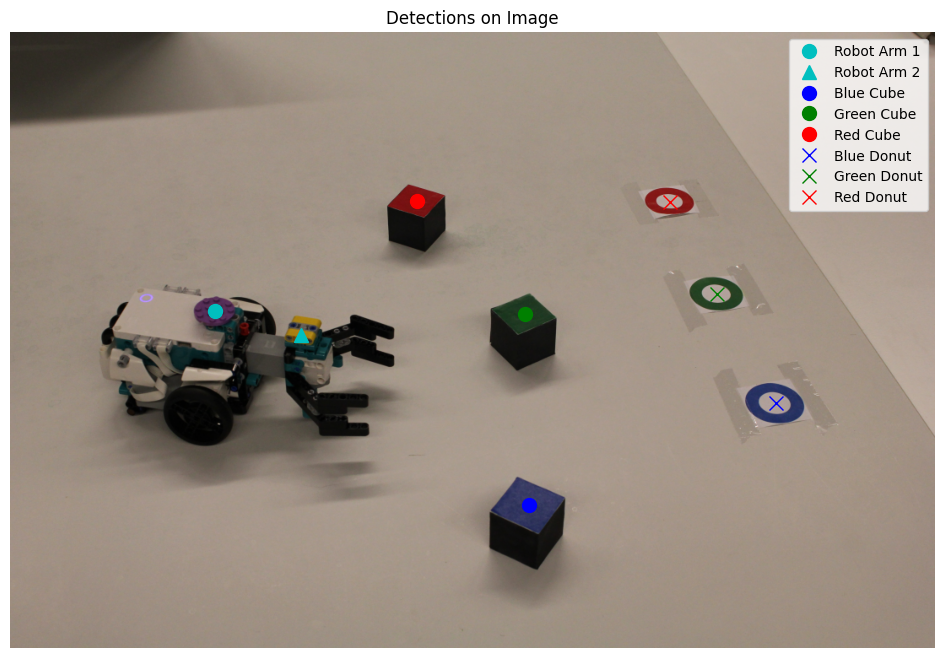

In [19]:
image_path = "last_day/image0102.png" 
new_size = calibration_image.shape[::-1][1:] #eg (1096,730 )
POSITIONS,cubes,donuts = visualization.localize_show(image_path, new_size )

### Corect Loc

In [6]:
# cubes, donuts = utils.swap(cubes, donuts,"green")
# resized_img = cv2.imread(image_path)
# rgb = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)
# visualization.plot_detections_on_image(rgb, POSITIONS, cubes, donuts)

In [20]:
projection = calibration.project_2d23d(POSITIONS,cubes,donuts,a,b,c)

In [21]:
robot3d = projection["robot"]
robot_arm = projection["arm"]
b_cube3d = projection["blue_cube"]
r_cube3d = projection["red_cube"]
g_cube3d = projection["green_cube"]
r_tar3d = projection["red_target"]
g_tar3d = projection["green_target"]
b_tar3d = projection["blue_target"]

In [9]:

visualization.show_sys3d (robot3d,robot_arm,b_cube3d,r_cube3d,g_cube3d, r_tar3d, g_tar3d,b_tar3d)

In [10]:

visualization.show_sys_plane(robot3d,robot_arm,b_cube3d,r_cube3d,g_cube3d, r_tar3d, g_tar3d,b_tar3d)

In [24]:
utils.command(robot_arm,robot3d, r_cube3d, r_tar3d)

turn(-74.22); go(27.82); grab(); turn(44.09); go(14.08); let_go()


In [ ]:
# Command sequence
cmds = [
    {"action": "turn", "value": -74.22},    # Rotate toward blue cube
    {"action": "go", "value": 27.82},      # Move to cube
    {"action": "grab"},                    # Pick cube
    {"action": "turn", "value": 44.09},   # Rotate toward target
    {"action": "go", "value": 14.08},      # Move to target
    {"action": "let_go"}                   # Release cube
]

visualization.vis_command(cmds,robot3d,robot_arm,b_cube3d,r_cube3d,g_cube3d, r_tar3d, g_tar3d,b_tar3d)

interactive(children=(IntSlider(value=0, description='Frame', max=102), Output()), _dom_classes=('widget-inter…